## Генерация выборки из заданного распределения

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import stats

Допустим, у нас есть генератор случайных числе из отрезка [0, 1] (используйте для этого функцию `np.random.rand()`). Как получить выборку из нового распределения $F$?



### Задача
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.


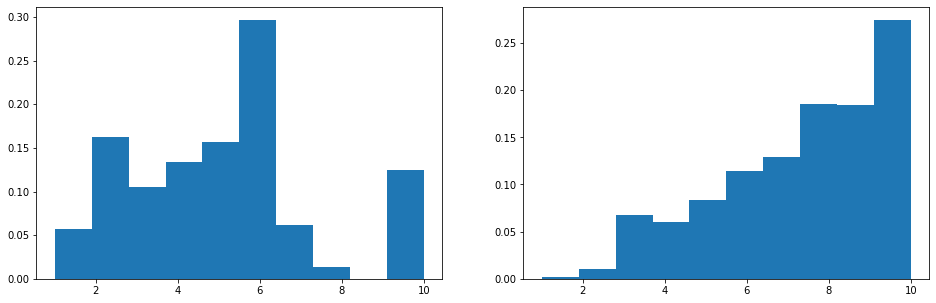

0.0009951591491699219  s.,  -0.0  s.


In [9]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

weights1 = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights1 = weights1/weights1.sum()

bounds1 = np.cumsum(weights1)
time1 = time.time()
ran_vec = np.random.rand(1000)
for i in range(len(weights1)):
    ran_vec[ran_vec < bounds1[i]] = i + 1
time1 -= time.time()

ax[0].hist(ran_vec,density=True)

weights2 = np.sort(weights1)
bounds2 = np.cumsum(weights2)
time2 = time.time()
ran_vec = np.random.rand(1000)
for i in range(len(weights2)):
    ran_vec[ran_vec < bounds2[i]] = i + 1
time2 -= time.time()
time1 *= -1
time2 *= -1

ax[1].hist(ran_vec,density=True)
plt.show()

print(time1, " s., ", time2, " s.")

### Inverse transform method

В следующем предложении заключается идея метода *inverse transform*:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)

Answer:  $\iff\exists F^{-1} \text{ i.e. } F \text{ is a strictly monotonic distribution function}$

### Задача
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

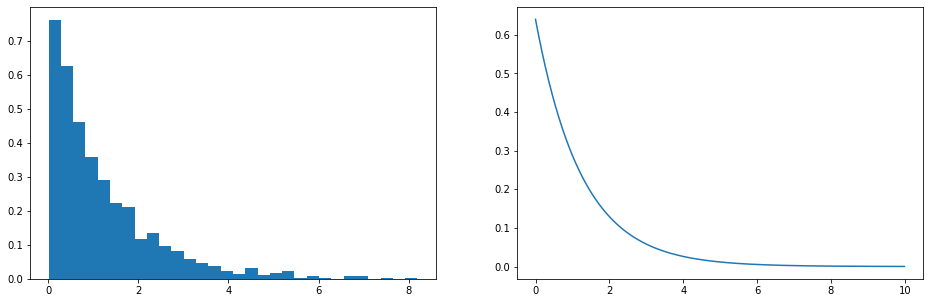

In [3]:
random_vector = np.random.rand(1000)
lambdaa = 0.8
random_vector = -np.log(1-random_vector)/lambdaa

fig, ax = plt.subplots(1, 2, figsize = (16, 5))

ax[0].hist(random_vector, density=True, bins = 30)
ax[1].plot(np.arange(1000)/100, lambdaa * np.exp(-np.arange(1000)*lambdaa/100)*lambdaa)
plt.show()

### Rejection sampling (Accept-reject method)

Идея метода: сэмплить из распределения, из которого умеем, а затем отбирать точки, которые следуют нужному распределению. Картинка иллюстрирует идею метода:

<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 40%;"/>
 

### Задача
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

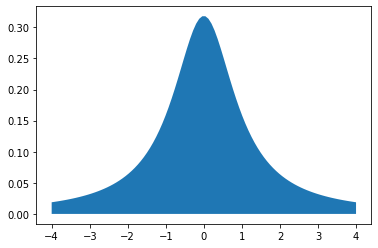

In [4]:
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

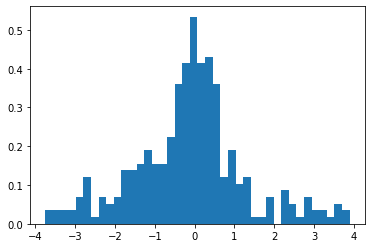

In [5]:
sample = np.array([8 * np.random.rand(1000) - 4])
check = np.random.rand(1000) / 3
cauchy = sample[(lambda x: 1 / ((x ** 2 + 1) * np.pi)) (sample) >= check]

plt.hist(cauchy, density = True, bins = 40)
plt.show()

##  Coordinate transformation method

Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива -  попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.

### Задача
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

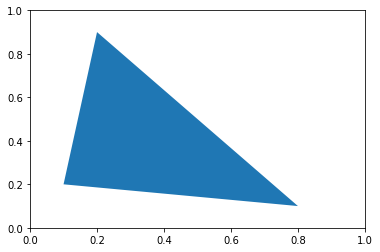

In [6]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

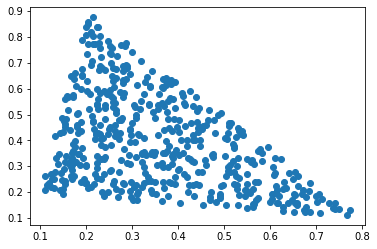

In [7]:
rand_square = np.random.rand(500, 2)

rand_triangle = rand_square[- 2 * rand_square[:, 0] + 2 > rand_square[:, 1]]
tmp_triangle = rand_square[- 2 * rand_square[:, 0] + 2 <= rand_square[:, 1]]
tmp_triangle[:, 0] = 0.5 - (tmp_triangle[:, 0] - 0.5)
tmp_triangle[:, 1] = 1 - (tmp_triangle[:, 1] - 1)
rand_triangle = np.vstack((rand_triangle, tmp_triangle))

tmp_triangle = np.array(rand_triangle)
rand_triangle[:, 0] = 7 * tmp_triangle[:, 0] + 0.5 * tmp_triangle[:, 1] + 1
rand_triangle[:, 1] = -1 * tmp_triangle[:, 0] + 3.5 * tmp_triangle[:, 1] + 2
rand_triangle = rand_triangle * 0.1

plt.scatter(rand_triangle[:, 0], rand_triangle[:, 1])
plt.show()

### Задача
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

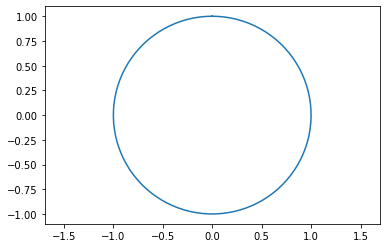

In [8]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

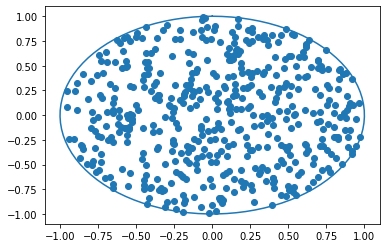

In [9]:
rand_square[:, 1] = rand_square[:, 1] * 2 * np.pi

rand_circle = np.array(rand_square)
rand_circle[:, 0] = np.sqrt(rand_square[:, 0]) * np.cos(rand_square[:, 1])
rand_circle[:, 1] = np.sqrt(rand_square[:, 0]) * np.sin(rand_square[:, 1])

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.scatter(rand_circle[:, 0], rand_circle[:, 1])
plt.show()

### Задача
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

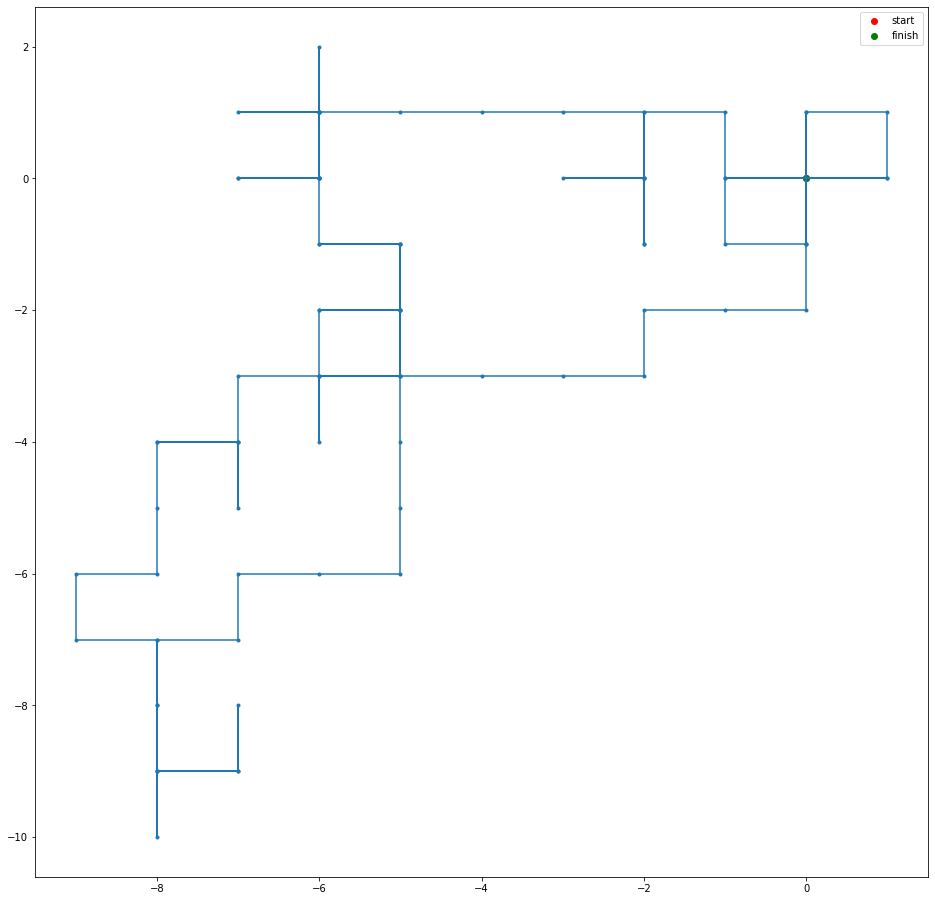

In [10]:
def dist(value):
    return np.abs(value[0]) + np.abs(value[1])

def dist_x(value):
    return np.abs(value[0])

def dist_y(value):
    return np.abs(value[1])

random_walk = np.array([[0, 0]])
n = 100
for i in range(1, n):
    tmp = np.random.rand()
    if (dist(random_walk[i - 1]) < n - i - 1):
        movement = ([-1, 0] if tmp < 0.25 else [1, 0] if tmp < 0.5 else [0, -1] if tmp < 0.75 else [0, 1])
    elif (dist_x(random_walk[i - 1]) > 0 and dist_y(random_walk[i - 1]) > 0):
        movement = ([-np.sign(random_walk[i - 1][0]), 0] if tmp < 0.5 else [0, -np.sign(random_walk[i - 1][1])])
    elif (dist_x(random_walk[i - 1]) > 0 and dist_y(random_walk[i - 1]) == 0):
        movement = [-np.sign(random_walk[i - 1][0]), 0]
    else:
        movement = [0, -np.sign(random_walk[i - 1][1])]
    value = random_walk[i - 1] + movement
    random_walk = np.vstack((random_walk, value))

plt.figure(figsize=(16, 16))
plt.plot(random_walk[:, 0], random_walk[:, 1])
plt.scatter(random_walk[:, 0], random_walk[:, 1], marker = '.')
plt.scatter(0, 0, c = 'r', marker = 'o', label = 'start')
plt.scatter(random_walk[-1, 0], random_walk[-1, 1], c = 'g', marker = 'o', label = 'finish')
plt.legend()
plt.show()

## Random normal generator

### Задача
Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

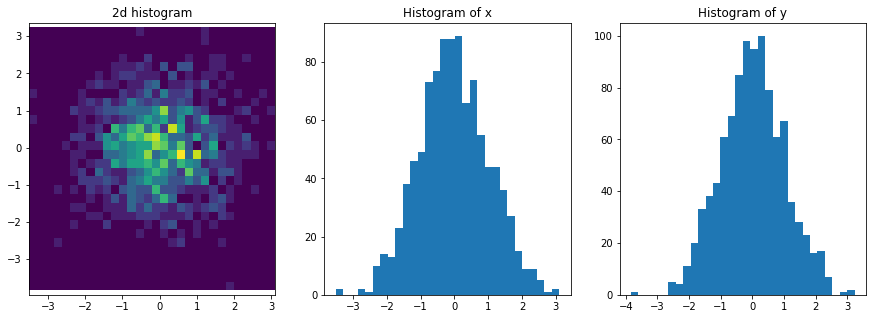

In [11]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

In [12]:
# Solution here

### Задача
Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.


In [13]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

### Задача
С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число $\pi$. Теоретически обоснуйте необходимое число бросаний, чтобы оценить число $\pi$ с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.


In [14]:
# Solution here

### Задача

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов. 

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [15]:
# Solution here